In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88394b95d8291bfdd5ab6b5a53be27b8


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 12 of Set 22 | la esperanza
Processing Record 13 of Set 22 | morant bay
Processing Record 14 of Set 22 | punta arenas
Processing Record 15 of Set 22 | taperoa
Processing Record 16 of Set 22 | the valley
Processing Record 17 of Set 22 | mar del plata
Processing Record 18 of Set 22 | deniliquin
Processing Record 19 of Set 22 | ushuaia
Processing Record 20 of Set 22 | kazalinsk
City not found. Skipping...
Processing Record 21 of Set 22 | vostok
Processing Record 22 of Set 22 | rikitea
Processing Record 23 of Set 22 | hermanus
Processing Record 24 of Set 22 | hilo
Processing Record 25 of Set 22 | impfondo
Processing Record 26 of Set 22 | georgetown
Processing Record 27 of Set 22 | atuona
Processing Record 28 of Set 22 | whitehorse
Processing Record 29 of Set 22 | vaini
Processing Record 30 of Set 22 | butaritari
Processing Record 31 of Set 22 | albany
Processing Record 32 of Set 22 | mahebourg
Processing Record 33 of Set 22 | dwarka
Processing Record 34 of Set 22 | yar-sa

Processing Record 35 of Set 25 | srednekolymsk
Processing Record 36 of Set 25 | zonguldak
Processing Record 37 of Set 25 | hanzhong
Processing Record 38 of Set 25 | rio grande
Processing Record 39 of Set 25 | sabha
Processing Record 40 of Set 25 | lebu
Processing Record 41 of Set 25 | kleck
City not found. Skipping...
Processing Record 42 of Set 25 | salo
Processing Record 43 of Set 25 | ous
Processing Record 44 of Set 25 | victoria
Processing Record 45 of Set 25 | kapaa
Processing Record 46 of Set 25 | neiafu
Processing Record 47 of Set 25 | half moon bay
Processing Record 48 of Set 25 | isangel
Processing Record 49 of Set 25 | saskylakh
Processing Record 50 of Set 25 | joshimath
Processing Record 1 of Set 26 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 26 | avarua
Processing Record 3 of Set 26 | hithadhoo
Processing Record 4 of Set 26 | matagami
Processing Record 5 of Set 26 | rolla
Processing Record 6 of Set 26 | saldanha
Processing Record 7 of Set 26 | port

Processing Record 20 of Set 29 | te anau
Processing Record 21 of Set 29 | kununurra
Processing Record 22 of Set 29 | payakumbuh
Processing Record 23 of Set 29 | acs
Processing Record 24 of Set 29 | svetlaya
Processing Record 25 of Set 29 | biak
Processing Record 26 of Set 29 | mount hagen
Processing Record 27 of Set 29 | flin flon
Processing Record 28 of Set 29 | tunghsiao
City not found. Skipping...
Processing Record 29 of Set 29 | kuryk
Processing Record 30 of Set 29 | araouane
Processing Record 31 of Set 29 | byron bay
Processing Record 32 of Set 29 | san cristobal
Processing Record 33 of Set 29 | kuragino
Processing Record 34 of Set 29 | nouadhibou
Processing Record 35 of Set 29 | groningen
Processing Record 36 of Set 29 | airai
Processing Record 37 of Set 29 | ekhabi
Processing Record 38 of Set 29 | prince rupert
Processing Record 39 of Set 29 | mergui
City not found. Skipping...
Processing Record 40 of Set 29 | gladstone
Processing Record 41 of Set 29 | kavaratti
Processing Recor

Processing Record 4 of Set 33 | moron
Processing Record 5 of Set 33 | vulcan
Processing Record 6 of Set 33 | yambio
Processing Record 7 of Set 33 | mednogorskiy
Processing Record 8 of Set 33 | zachagansk
City not found. Skipping...
Processing Record 9 of Set 33 | sabang
Processing Record 10 of Set 33 | asfi
Processing Record 11 of Set 33 | curup
Processing Record 12 of Set 33 | axim
Processing Record 13 of Set 33 | urengoy
Processing Record 14 of Set 33 | tazovskiy
Processing Record 15 of Set 33 | kelowna
Processing Record 16 of Set 33 | bandundu
Processing Record 17 of Set 33 | mainz
Processing Record 18 of Set 33 | bestobe
Processing Record 19 of Set 33 | lexington park
Processing Record 20 of Set 33 | sicamous
Processing Record 21 of Set 33 | athabasca
Processing Record 22 of Set 33 | samusu
City not found. Skipping...
Processing Record 23 of Set 33 | nara
Processing Record 24 of Set 33 | hervey bay
Processing Record 25 of Set 33 | teknaf
Processing Record 26 of Set 33 | cape canave

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Esperanza,14.8667,-91.5667,54.75,100,47,4.47,GT,2022-01-18 02:53:29
1,Morant Bay,17.8815,-76.4093,78.42,84,27,6.53,JM,2022-01-18 02:53:29
2,Punta Arenas,-53.1500,-70.9167,48.31,76,0,13.80,CL,2022-01-18 02:51:27
3,Taperoa,-7.2075,-36.8267,71.02,83,43,12.39,BR,2022-01-18 02:53:30
4,The Valley,18.2170,-63.0578,78.66,76,18,15.68,AI,2022-01-18 02:53:30
5,Mar Del Plata,-38.0023,-57.5575,65.08,70,100,3.00,AR,2022-01-18 02:49:32
6,Deniliquin,-35.5333,144.9667,80.85,30,100,5.23,AU,2022-01-18 02:53:31
7,Ushuaia,-54.8000,-68.3000,46.06,71,40,27.63,AR,2022-01-18 02:50:08
8,Vostok,46.4856,135.8833,1.62,92,100,4.25,RU,2022-01-18 02:53:31
9,Rikitea,-23.1203,-134.9692,77.63,72,78,6.98,PF,2022-01-18 02:49:20


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1642477349.151534

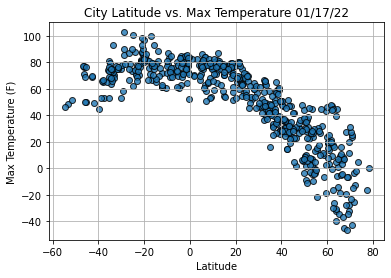

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

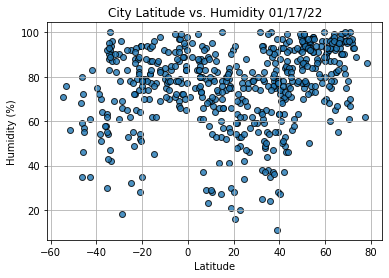

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

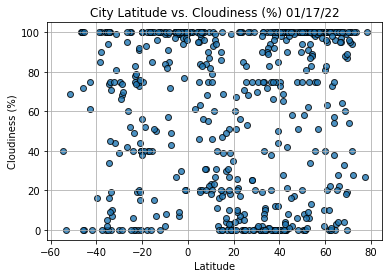

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

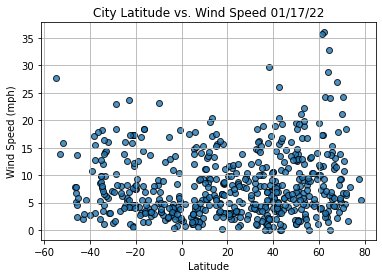

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()